In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Loading the data

In [2]:
df = pd.read_csv(r"C:\Users\amit9\Downloads\archive\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data = df.drop(['society', 'balcony'], axis = 1)

# Data Cleaning

In [4]:
data.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [5]:
data.dropna(inplace = True)

In [6]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [7]:
data.duplicated().sum()

668

In [8]:
data.drop_duplicates(keep = 'first', inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12578 non-null  object 
 1   availability  12578 non-null  object 
 2   location      12578 non-null  object 
 3   size          12578 non-null  object 
 4   total_sqft    12578 non-null  object 
 5   bath          12578 non-null  float64
 6   price         12578 non-null  float64
dtypes: float64(2), object(5)
memory usage: 786.1+ KB


# Data Preprocessing

In [10]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
data['bhk'] = data['size'].apply(lambda x : int(x.split(' ')[0]))

In [12]:
data.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
data[data['bhk'] > 20]

,area_type,availability,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
data[~data['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def area_conversion(x):
    if "-" in x:
        num = x.split("-")
        return (float(num[0]) + float(num[1]) / 2)
    
    elif "Meter" in x:
        num = x.split("S")
        return (float(num[0]) * 10.764)
    
    elif "Acres" in x:
        num = x.split("A")
        return (float(num[0]) * 43560)
    
    elif "Perch" in x:
        num = x.split("P")
        return (float(num[0]) * 272.3)
    
    elif "Yards" in x:
        num = x.split("S")
        return (float(num[0]) * 9)
    
    elif "Cents" in x:
        num = x.split("C")
        return (float(num[0]) * 435.6)
    
    elif "Guntha" in x:
        num = x.split("G")
        return (float(num[0]) * 1089)
    
    elif "Grounds" in x:
        num = x.split("G")
        return (float(num[0]) * 2400.3)
    
    else:
        return (float(x))

In [18]:
'100Sq Metres'.split("S")

['100', 'q Metres']

In [19]:
data['total_sqft'] = data['total_sqft'].apply(area_conversion)

In [20]:
data[data['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [21]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
bhk             0
dtype: int64

In [22]:
data['price_per_sqft'] = (data['price'] * 100000) / data['total_sqft']

In [23]:
data.head(20)

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [24]:
data['location'] = data['location'].apply(lambda x : x.strip())

In [25]:
data['location'].nunique()

1293

In [26]:
loc_stats = data.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               516
Sarjapur  Road           369
Electronic City          288
Kanakpura Road           233
Thanisandra              229
                        ... 
Kanakapura Road,           1
Kanakapura main  Road      1
Kariyammana Agrahara       1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
loc_stats_less_than_10 = loc_stats[loc_stats <= 10]
loc_stats_less_than_10

location
Dairy Circle             10
Sadashiva Nagar          10
Gunjur Palya             10
Nagappa Reddy Layout     10
Naganathapura            10
                         ..
Kanakapura Road,          1
Kanakapura main  Road     1
Kariyammana Agrahara      1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1061, dtype: int64

In [28]:
len(loc_stats[loc_stats <= 10])

1061

In [29]:
data['location'] = data['location'].apply(lambda x : 'other' if x in loc_stats_less_than_10 else x)

In [30]:
data['location'].nunique()

233

In [31]:
data.shape

(12578, 9)

In [32]:
data[data['total_sqft'] / data['bhk'] < 300].head(10)

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Plot Area,Ready To Move,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Plot Area,Ready To Move,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,Plot Area,Ready To Move,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


According to dataset, each room in flats are atleast 300 sq. ft., so anything that have room area less than 300sq.ft. we should drop all those rows.

In [33]:
upd_data = data[~(data['total_sqft'] / data['bhk'] < 300)]
upd_data.shape

(11842, 9)

In [34]:
upd_data['price_per_sqft'].describe()

count     11842.000000
mean       6350.197289
std        4254.660350
min           2.257423
25%        4207.320004
50%        5319.148936
75%        6970.069701
max      176470.588235
Name: price_per_sqft, dtype: float64

Here getting the property in Bangalore at 2 rupees per sq. foot is not practically possible, so this is an error too.  

In [35]:
def outliers_removal(df):
    df_output = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        sd = np.std(subdf['price_per_sqft'])
        
        inter_df = subdf[(subdf['price_per_sqft'] > (m-sd)) & (subdf['price_per_sqft'] <= (m+sd))]
        
        df_output = pd.concat([df_output, inter_df], ignore_index= True)
        
    return df_output

In [36]:
temp_data = outliers_removal(upd_data)
temp_data.shape

(9715, 9)

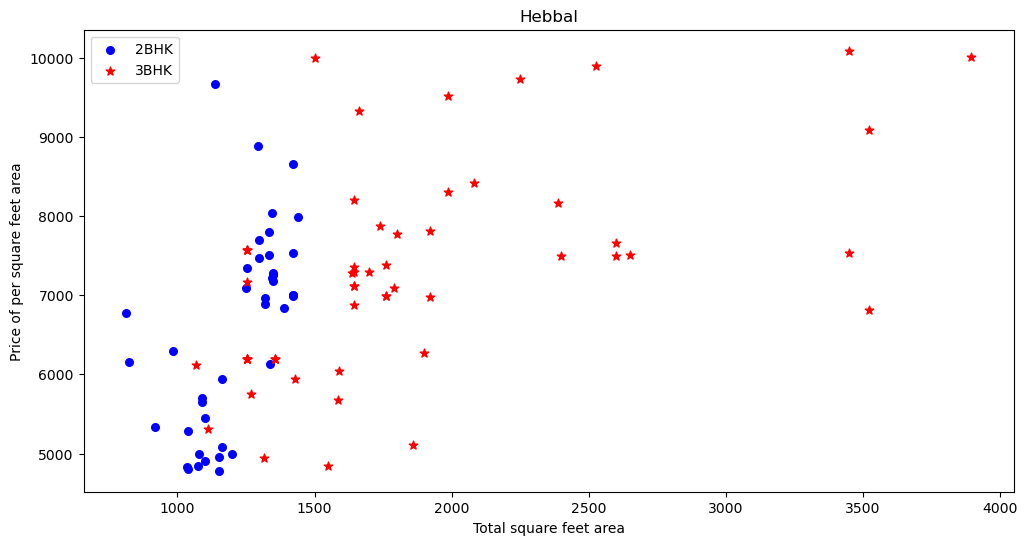

In [37]:
def plot_scatter(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    
    plt.rcParams['figure.figsize'] = (12,6)
    plt.scatter(bhk2['total_sqft'], bhk2['price_per_sqft'], color = 'blue', s = 30, label = "2BHK")
    plt.scatter(bhk3['total_sqft'], bhk3['price_per_sqft'], color = 'red', s = 40, label = "3BHK", marker = '*')
    plt.xlabel('Total square feet area')
    plt.ylabel('Price of per square feet area')
    plt.title(location)
    plt.legend()
    plt.show()
    

plot_scatter(temp_data, 'Hebbal')

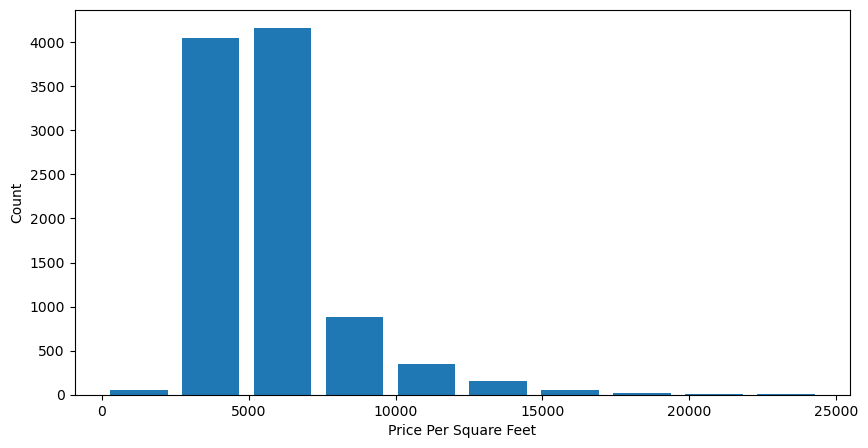

In [38]:
plt.figure(figsize = (10,5))
plt.hist(temp_data['price_per_sqft'], rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.show()

Here, the price per sq. feet till 12500 shows almost like an normal distribution curve after removing several outliers from the data. 

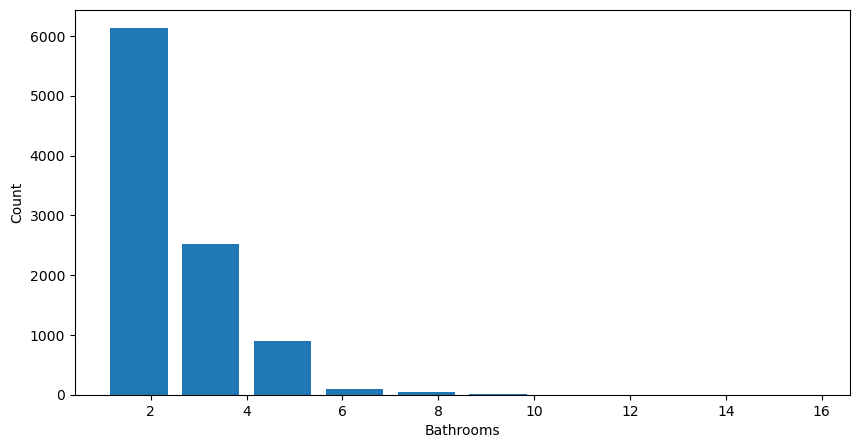

In [39]:
plt.figure(figsize = (10,5))
plt.hist(temp_data['bath'], rwidth = 0.8)
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

There are also some outliers in the bath column.So, let's work on that.... 

In [40]:
temp_data['bath'].value_counts()

2.0     5555
3.0     2514
4.0      670
1.0      576
5.0      236
6.0      104
7.0       28
8.0       17
9.0       10
12.0       3
16.0       1
13.0       1
Name: bath, dtype: int64

Removing the data entries having more number of bathrooms than the sum of bedrooms + 2 bathrooms (a standard case)

In [41]:
temp_data[temp_data['bath'] > temp_data['bhk'] + 2]

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
1506,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4897,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6240,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7859,Super built-up Area,Ready To Move,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [42]:
temp_data.shape

(9715, 9)

In [43]:
temp2_data = temp_data[temp_data['bath'] <= temp_data['bhk'] + 2]
temp2_data.shape

(9711, 9)

In [44]:
final_data = temp2_data.drop(['size', 'price_per_sqft'], axis = 1)

In [45]:
final_data.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,148.0,2


In [46]:
final_data['availability'] = final_data['availability'].map(lambda x : 1 if x == "Ready To Move" else 0)

In [47]:
final_data.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,0,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,0,1st Block Jayanagar,1235.0,2.0,148.0,2


In [48]:
final_data['area_type'].value_counts()

Super built-up  Area    6954
Built-up  Area          1965
Plot  Area               731
Carpet  Area              61
Name: area_type, dtype: int64

Encoding the "area_type" column using Label Encoder

In [49]:
lb = LabelEncoder()
final_data['area_type'] = lb.fit_transform(final_data['area_type'])

In [50]:
final_data.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,3,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,3,0,1st Block Jayanagar,1630.0,3.0,194.0,3
2,3,1,1st Block Jayanagar,1875.0,2.0,235.0,3
3,0,0,1st Block Jayanagar,1200.0,2.0,130.0,3
4,3,0,1st Block Jayanagar,1235.0,2.0,148.0,2


In [51]:
correlation = final_data.drop('location', axis = 1).corr()

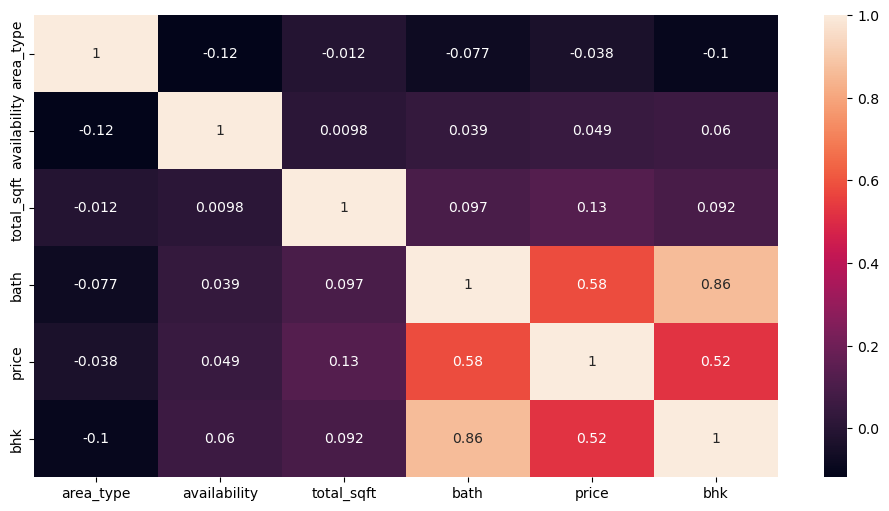

In [52]:
sns.heatmap(correlation, annot = True, fmt = '.2g')
plt.show()

Getting Dummies columns for the location column

In [53]:
dummies = pd.get_dummies(final_data['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
final_data.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
price           0
bhk             0
dtype: int64

In [55]:
dummies.isnull().sum()

1st Block Jayanagar     0
1st Phase JP Nagar      0
2nd Stage Nagarbhavi    0
5th Block Hbr Layout    0
5th Phase JP Nagar      0
                       ..
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
other                   0
Length: 233, dtype: int64

In [56]:
final = pd.concat([final_data.drop('location', axis = 1),
                   dummies.drop('other', axis = 1)],
                  axis = 1)

In [57]:
final.head()

,area_type,availability,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,0,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
final.isnull().sum()

area_type             0
availability          0
total_sqft            0
bath                  0
price                 0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 238, dtype: int64

# Train Test Split

In [59]:
X = final.drop(['price', 'availability', 'area_type'], axis = 1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = final['price']
y[0:5]

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 14)

# Machine Learning Model

## Linear Regression

In [62]:
clf = LinearRegression()

clf.fit(x_train, y_train)

LinearRegression()

In [63]:
clf.score(x_test, y_test)

0.5799625446080243

##  Lasso 

In [64]:
clf_lasso = Lasso(alpha = 0.001, max_iter = 200, random_state = 40)
clf_lasso.fit(x_train, y_train)

Lasso(alpha=0.001, max_iter=200, random_state=40)

In [65]:
clf_lasso.score(x_test, y_test)

0.5802860612647611

## Ridge

In [66]:
clf_ridge = Ridge(alpha = 0.1, max_iter = 100, random_state = 3)
clf_ridge.fit(x_train, y_train)

Ridge(alpha=0.1, max_iter=100, random_state=3)

In [67]:
clf_ridge.score(x_test, y_test)

0.5802940097483258

In [68]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

## Decision Tree

In [69]:
clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [70]:
clf_dt.score(x_test, y_test)

0.4690468628983979

## Random Forest

In [71]:
clf_rf = RandomForestRegressor()
clf_rf.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
clf_rf.score(x_test, y_test)

0.7037256492356249

## Gradient Boost

In [73]:
clf_gb = GradientBoostingRegressor()
clf_gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [74]:
clf_gb.score(x_test, y_test)

0.7677864502404754

# Boosting Algorithms

In [75]:
model = AdaBoostRegressor(estimator = clf_gb, learning_rate = 0.8, n_estimators = 4, random_state = 1)
model.fit(x_train, y_train)

AdaBoostRegressor(estimator=GradientBoostingRegressor(), learning_rate=0.8,
                  n_estimators=4, random_state=1)

In [76]:
model.score(x_test, y_test)

0.780882687605917

# Cross-Validation

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cvs = ShuffleSplit(n_splits = 5, test_size = 0.2,  random_state = 1)

cross_val_score(model, X, y, cv = cvs)

array([0.77564874, 0.71392828, 0.63759791, 0.70803046, 0.77505879])

# Grid Search CV

In [78]:
parameters = {'n_estimators' : np.arange(2,10,2),
             'learning_rate' : (0.6, 0.7, 0.8, 0.9, 1.0)}

In [79]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator = model, param_grid = parameters, cv = cvs, return_train_score = False)
gs.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.2, train_size=None),
             estimator=AdaBoostRegressor(estimator=GradientBoostingRegressor(),
                                         learning_rate=0.8, n_estimators=4,
                                         random_state=1),
             param_grid={'learning_rate': (0.6, 0.7, 0.8, 0.9, 1.0),
                         'n_estimators': array([2, 4, 6, 8])})

In [80]:
gs.best_score_

0.7312876184487527

In [81]:
gs.best_params_

{'learning_rate': 0.8, 'n_estimators': 6}

In [82]:
model2 = AdaBoostRegressor(estimator = clf_gb, learning_rate = 0.8, n_estimators = 6, random_state = 1)
model2.fit(x_train, y_train)

AdaBoostRegressor(estimator=GradientBoostingRegressor(), learning_rate=0.8,
                  n_estimators=6, random_state=1)

In [83]:
model2.score(x_test, y_test)

0.7815680975122683

Now, using Grid Search CV, we have found the best parameters for our model, which gives us a testing accuracy of 78%. Our model2 is consist of Gradient Boosting regressor algorithm which we further trained using AdaBoost Regressor algorithm. 

# Mean Absolute Error

In [84]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"Mean absolute error = {mean_absolute_error(y_test, model2.predict(x_test))}")

Mean absolute error = 21.378626384773945


In [85]:
print(f"Accuracy of model (in %) = {r2_score(y_test, model2.predict(x_test))*100} %")

Accuracy of model (in %) = 78.15680975122683 %


# Making predictions

In [86]:
np.where(X.columns == "Hebbal")

(array([96], dtype=int64),)

In [87]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return model2.predict([x])[0]

In [88]:
import warnings

warnings.filterwarnings('ignore')

In [89]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

49.939392556186036

In [90]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

57.48978967741839

In [91]:
predict_price('Indira Nagar', 1000, 2, 2)

100.72157857154095

In [92]:
predict_price('Indira Nagar', 1000, 3, 3)

108.57964911625696

# Saving The Model using Joblib

In [93]:
import joblib

joblib.dump(model2, "Bangalore_Real_Estate_Model.jbl")

['Bangalore_Real_Estate_Model.jbl']

In [96]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [97]:
X.to_csv(r"C:\Users\amit9\Projects\Real Estate Price Prediction\Required_columns_data.csv")